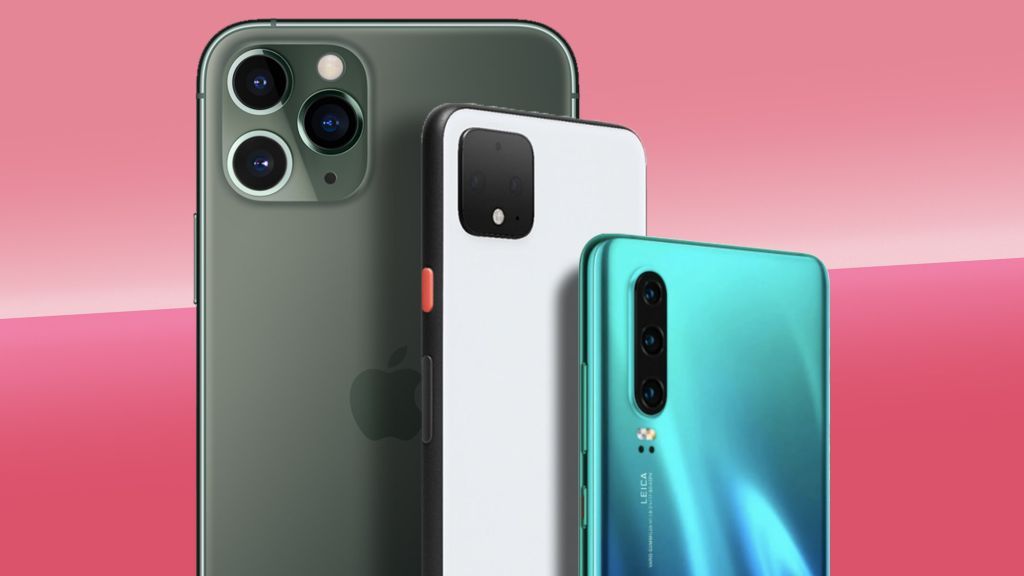

This notebook concentrates in understanding the train data that is provided and training diffrent classification models in order to get the model with the best accuracy.
Once the model with the best accuracy is obtained the model is used to classify the data in the test.csv file and then appended to the file for further use.

So, lets begin!

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
#Read the train dataset
df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

In [ ]:
#first few rows
df.head()

In [ ]:
#length of dataset
len(df)

In [ ]:
#check for null values
df.isnull().sum()

In [ ]:
#confirm with heatmap
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [ ]:
#check the datatypes
df.dtypes

In [ ]:
#report
df.describe().T

In [ ]:
sns.catplot(x = 'blue', data = df, kind = 'count')

In [ ]:
sns.catplot(x = 'four_g', data = df, kind = 'count')

In [ ]:
sns.catplot(x = 'three_g', data = df, kind = 'count')

In [ ]:
sns.catplot(x = 'touch_screen', data = df, kind = 'count')

In [ ]:
sns.catplot(x = 'price_range', data = df, kind = 'count')

In [ ]:
#number of 3G phones with respect to number of cores
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
sns.countplot(x = "n_cores", hue = 'three_g', data = df)
plt.title("3G with respect to number of cores")
plt.show()

In [ ]:
#number of 4G phones with respect to number of cores
plt.figure(figsize = (10,6))
sns.countplot(x = "n_cores", hue = 'four_g', data = df)
plt.title("4G with respect to number of cores")
plt.show()

In [ ]:
#number of touch screen phones with respect to price range
plt.figure(figsize = (10,6))
sns.countplot(x = "price_range", hue = 'touch_screen', data = df)
plt.title("Count of touch screen phones for each price range")
plt.show()

In [ ]:
#number of dual sim phones for each price range
plt.figure(figsize = (10,6))
sns.countplot(x = "price_range", hue = 'dual_sim', data = df)
plt.title("Count of dual sim phones for each price range")
plt.show()

In [ ]:
#Choose price range as the desired label. Check correlation of the table.
df.corr()['price_range'].sort_values()

In [ ]:
#heatmap for correlation
f, ax = plt.subplots(figsize = (20,12))
sns.heatmap(df.corr(), vmax = 0.8, square = True)

From the above heatmap it can be seen that the feature "ram" has the highest correlation with price_range.

Considering **price_range** as the label and the remaining as features. We have **four classes** as seen above, that is 0 1 2 and 3.

Lets begin creating a **classification model**, each models accuracy will be checked to determine the best model for classification.
1. Logistic Regression Classifier
1. KNN
1. SVM
1. Naive Bayes
1. Random Forest Classifier
1. Gradient Boosting Classifier

In [ ]:
#Divide the dataset into X and y
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
#scale the value of X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
#split into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

**LOGISTIC CLASSIFICATION**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, multi_class = 'auto', solver = 'lbfgs')
classifier.fit(X_train, y_train)

In [ ]:
#predicting the values
y_pred = classifier.predict(X_test)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_Log = confusion_matrix(y_test, y_pred)

In [ ]:
cm_Log

In [ ]:
#Accuracy and report of the classifier
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test,y_pred)

In [ ]:
#report
report_Log = classification_report(y_test, y_pred)
print(report_Log)

**KNN CLASSIFIER**

In [ ]:
#KNNeighbours
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p =2)
classifier.fit(X_train, y_train)

In [ ]:
#predicting the values
y_pred = classifier.predict(X_test)

In [ ]:
#confusion matrix
cm_KNN = confusion_matrix(y_test, y_pred)
print(cm_KNN)

In [ ]:
#Accuracy
accuracy_score(y_test,y_pred)

In [ ]:
#Report
report_KNN = classification_report(y_test, y_pred)
print(report_KNN)

**SVM CLASSIFICATION**

In [ ]:
#SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, C = 100)
classifier.fit(X_train,y_train)

In [ ]:
#predicting the values
y_pred = classifier.predict(X_test)

In [ ]:
#confusion matrix
cm_SVC = confusion_matrix(y_test, y_pred)
print(cm_SVC)

In [ ]:
#Accuracy
accuracy_score(y_test,y_pred)

In [ ]:
#Report
report_SVC = classification_report(y_test, y_pred)
print(report_SVC)

**NAIVE BAYES CLASSIFIER**

In [ ]:
#NaiveBayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

In [ ]:
#predicting the values
y_pred = classifier.predict(X_test)

In [ ]:
#confusion matrix
cm_NB = confusion_matrix(y_test, y_pred)
print(cm_NB)

In [ ]:
#Accuracy
accuracy_score(y_test,y_pred)

In [ ]:
#Report
report_NB = classification_report(y_test, y_pred)
print(report_NB)

**RANDOM FOREST CLASSIFIER**

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)

In [ ]:
#predicting the values
y_pred = classifier.predict(X_test)

In [ ]:
#confusion matrix
cm_RF = confusion_matrix(y_test, y_pred)
print(cm_RF)

In [ ]:
#Accuracy
accuracy_score(y_test,y_pred)

In [ ]:
#Report
report_RF = classification_report(y_test, y_pred)
print(report_RF)

**GRADIENT BOOSTING CLASSIFIER**

In [ ]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train,y_train)

In [ ]:
#predicting the values
y_pred = classifier.predict(X_test)

In [ ]:
#confusion matrix
cm_GBC = confusion_matrix(y_test, y_pred)
print(cm_GBC)

In [ ]:
#Accuracy
accuracy_score(y_test,y_pred)

In [ ]:
#Report
report_GBC = classification_report(y_test, y_pred)
print(report_GBC)

From the above models it can be notices that their accuracy is as follows,

* Logistic Regression Classifier - 95.5%
* KNN Classifier - 56.75%
* SVM Classifier - 95.75%
* Naive Bayes Classifier - 83.5%
* Random Forest Classifier - 86.5%
* Gradient Boost Classifier - 91.25%

Thus we can choose the **SVM Classifier** to classify the data in the test set provided as it has the highest accuracy among the models that we compared.

In [ ]:
#Select SVM for classification
Test = pd.read_csv('/kaggle/input/mobile-price-classification/test.csv')
df_test = Test.drop(['id'], axis = 1)
df_test = sc.fit_transform(df_test)

In [ ]:
#classify
y_Test_values = classifier.predict(df_test)

In [ ]:
#join the predicted values to the test dataset
Test['price_range'] = y_Test_values

In [ ]:
#display Test 
Test.head()

**This gives us the new dataset with the added price_range column based on the SVM Classifier.**

**I hope this notebook was helpful :)**

*** Classification DONE!***
